# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Mohammad Ferry Irwansyah
- **Email:** ferryirwansyah394251@gmail.com
- **ID Dicoding:** ferry_777

## Menentukan Pertanyaan Bisnis

Berikut adalah empat pertanyaan bisnis yang akan dijawab melalui proses analisis data:

1. **Bagaimana tren jumlah order dan revenue bulanan pada platform e-commerce ini?**
   - Tujuan: Memahami pola pertumbuhan penjualan dari waktu ke waktu untuk mengidentifikasi tren naik/turun dan seasonality.

2. **Kategori produk apa yang paling banyak terjual dan menghasilkan revenue tertinggi?**
   - Tujuan: Mengidentifikasi kategori produk unggulan yang menjadi penggerak utama bisnis.

3. **Bagaimana distribusi skor review pelanggan dan apa hubungannya dengan waktu pengiriman?**
   - Tujuan: Mengevaluasi tingkat kepuasan pelanggan dan memahami faktor yang mempengaruhi review.

4. **Bagaimana segmentasi pelanggan berdasarkan RFM (Recency, Frequency, Monetary) Analysis?**
   - Tujuan: Mengelompokkan pelanggan berdasarkan perilaku pembelian untuk strategi marketing yang lebih efektif.

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime

# Konfigurasi tampilan
sns.set_theme(style="whitegrid", palette="deep")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
pd.options.display.max_columns = 50
pd.options.display.float_format = '{:,.2f}'.format

print("Library berhasil di-import!")

Library berhasil di-import!


## Data Wrangling

### Gathering Data

Pada tahap ini, kita akan memuat seluruh dataset yang tersedia dari E-Commerce Public Dataset. 
Dataset ini terdiri dari beberapa tabel yang saling terhubung melalui key tertentu.

In [2]:
# Load semua dataset
customers_df = pd.read_csv("data/customers_dataset.csv")
orders_df = pd.read_csv("data/orders_dataset.csv")
order_items_df = pd.read_csv("data/order_items_dataset.csv")
order_payments_df = pd.read_csv("data/order_payments_dataset.csv")
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv")
products_df = pd.read_csv("data/products_dataset.csv")
sellers_df = pd.read_csv("data/sellers_dataset.csv")
category_translation_df = pd.read_csv("data/product_category_name_translation.csv")

print("Semua dataset berhasil dimuat!")

Semua dataset berhasil dimuat!


In [3]:
# Melihat ukuran masing-masing dataset
datasets = {
    "customers": customers_df,
    "orders": orders_df,
    "order_items": order_items_df,
    "order_payments": order_payments_df,
    "order_reviews": order_reviews_df,
    "products": products_df,
    "sellers": sellers_df,
    "category_translation": category_translation_df
}

for name, df in datasets.items():
    print(f"{name}: {df.shape[0]} baris, {df.shape[1]} kolom")

customers: 99441 baris, 5 kolom
orders: 99441 baris, 8 kolom
order_items: 112650 baris, 7 kolom
order_payments: 103886 baris, 5 kolom
order_reviews: 99224 baris, 7 kolom
products: 32951 baris, 9 kolom
sellers: 3095 baris, 4 kolom
category_translation: 71 baris, 2 kolom


In [4]:
# Preview setiap dataset
for name, df in datasets.items():
    print(f"\n{'='*60}")
    print(f"Dataset: {name}")
    print(f"{'='*60}")
    display(df.head(3))


Dataset: customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP



Dataset: orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00



Dataset: order_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87



Dataset: order_payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71



Dataset: order_reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24



Dataset: products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.00,287.00,1.00,225.00,16.00,10.00,14.00
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.00,276.00,1.00,"1,000.00",30.00,18.00,20.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.00,250.00,1.00,154.00,18.00,9.00,15.00



Dataset: sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ



Dataset: category_translation


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


**Insight:**
- Dataset terdiri dari 8 tabel yang saling terhubung, mencakup data pelanggan, pesanan, item pesanan, pembayaran, review, produk, penjual, dan terjemahan kategori.
- Tabel `orders` merupakan tabel utama yang menghubungkan pelanggan dengan pesanan mereka.
- Tabel `order_items` menghubungkan pesanan dengan produk dan penjual.

### Assessing Data

Pada tahap ini, kita akan memeriksa kualitas data: tipe data, missing values, dan duplikat.

In [5]:
# Memeriksa info dan missing values pada setiap dataset
for name, df in datasets.items():
    print(f"\n{'='*60}")
    print(f"Dataset: {name}")
    print(f"{'='*60}")
    print(f"\nTipe Data:")
    print(df.dtypes)
    print(f"\nMissing Values:")
    missing = df.isnull().sum()
    missing_pct = (df.isnull().sum() / len(df) * 100).round(2)
    missing_info = pd.DataFrame({"Missing": missing, "Percentage (%)": missing_pct})
    print(missing_info[missing_info["Missing"] > 0])
    print(f"\nDuplikat: {df.duplicated().sum()} baris")


Dataset: customers

Tipe Data:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Missing Values:
Empty DataFrame
Columns: [Missing, Percentage (%)]
Index: []

Duplikat: 0 baris

Dataset: orders

Tipe Data:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Missing Values:
                               Missing  Percentage (%)
order_approved_at                  160            0.16
order_delivered_carrier_date      1783            1.79
order_delivered_customer_date     2965            2.98



Duplikat: 0 baris

Dataset: order_items

Tipe Data:
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Missing Values:
Empty DataFrame
Columns: [Missing, Percentage (%)]
Index: []

Duplikat: 0 baris

Dataset: order_payments

Tipe Data:
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

Missing Values:
Empty DataFrame
Columns: [Missing, Percentage (%)]
Index: []

Duplikat: 0 baris

Dataset: order_reviews

Tipe Data:
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

Missing Values:
      

**Insight:**
- Terdapat beberapa kolom datetime yang masih bertipe `object` dan perlu dikonversi.
- Kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date` memiliki missing values karena beberapa pesanan belum selesai diproses.
- Dataset `order_reviews` memiliki missing values pada kolom `review_comment_title` dan `review_comment_message` karena tidak semua pelanggan memberikan komentar.
- Dataset `products` memiliki sedikit missing values pada beberapa kolom dimensi produk.

### Cleaning Data

Pada tahap ini, kita akan membersihkan data: konversi tipe data, menangani missing values, dan menghapus duplikat.

In [6]:
# 1. Konversi kolom datetime pada orders_df
datetime_cols = [
    'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in datetime_cols:
    orders_df[col] = pd.to_datetime(orders_df[col], errors='coerce')

print("Tipe data kolom datetime pada orders_df setelah konversi:")
print(orders_df[datetime_cols].dtypes)

Tipe data kolom datetime pada orders_df setelah konversi:
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


In [7]:
# 2. Konversi kolom datetime pada order_reviews_df
review_datetime_cols = ['review_creation_date', 'review_answer_timestamp']
for col in review_datetime_cols:
    order_reviews_df[col] = pd.to_datetime(order_reviews_df[col], errors='coerce')

print("Tipe data kolom datetime pada order_reviews_df setelah konversi:")
print(order_reviews_df[review_datetime_cols].dtypes)

Tipe data kolom datetime pada order_reviews_df setelah konversi:
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object


In [8]:
# 3. Konversi kolom datetime pada order_items_df
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'], errors='coerce')

print("Tipe data shipping_limit_date:", order_items_df['shipping_limit_date'].dtype)

Tipe data shipping_limit_date: datetime64[ns]


In [9]:
# 4. Menangani missing values
# Untuk orders_df: drop rows yang belum delivered (fokus analisis pada pesanan yang selesai)
orders_clean_df = orders_df.dropna(subset=['order_delivered_customer_date']).copy()
print(f"Orders sebelum cleaning: {len(orders_df)}, sesudah: {len(orders_clean_df)}")

# Untuk products_df: drop rows dengan missing category
products_clean_df = products_df.dropna(subset=['product_category_name']).copy()
print(f"Products sebelum cleaning: {len(products_df)}, sesudah: {len(products_clean_df)}")

# Untuk reviews: missing comment adalah normal (tidak semua pelanggan memberikan komentar)
# Tidak perlu di-drop

Orders sebelum cleaning: 99441, sesudah: 96476
Products sebelum cleaning: 32951, sesudah: 32341


In [10]:
# 5. Menerjemahkan nama kategori produk ke bahasa Inggris
products_clean_df = products_clean_df.merge(
    category_translation_df,
    on='product_category_name',
    how='left'
)

# Gunakan nama English, fallback ke nama asli jika tidak ada terjemahan
products_clean_df['product_category'] = products_clean_df['product_category_name_english'].fillna(
    products_clean_df['product_category_name']
)

print("Contoh terjemahan kategori:")
print(products_clean_df[['product_category_name', 'product_category']].drop_duplicates().head(10))

Contoh terjemahan kategori:
   product_category_name     product_category
0             perfumaria            perfumery
1                  artes                  art
2          esporte_lazer       sports_leisure
3                  bebes                 baby
4  utilidades_domesticas           housewares
5  instrumentos_musicais  musical_instruments
6             cool_stuff           cool_stuff
7       moveis_decoracao      furniture_decor
8       eletrodomesticos      home_appliances
9             brinquedos                 toys


In [11]:
# 6. Membuat dataset gabungan utama (all_data)
all_data = orders_clean_df.merge(order_items_df, on='order_id', how='inner')
all_data = all_data.merge(products_clean_df[['product_id', 'product_category']], on='product_id', how='left')
all_data = all_data.merge(customers_df, on='customer_id', how='left')
all_data = all_data.merge(order_payments_df, on='order_id', how='left')
all_data = all_data.merge(
    order_reviews_df[['order_id', 'review_score']],
    on='order_id',
    how='left'
)

# Tambahkan kolom revenue (price + freight_value)
all_data['revenue'] = all_data['price'] + all_data['freight_value']

# Tambahkan kolom delivery_time (hari)
all_data['delivery_time'] = (
    all_data['order_delivered_customer_date'] - all_data['order_purchase_timestamp']
).dt.days

# Tambahkan kolom order_month
all_data['order_month'] = all_data['order_purchase_timestamp'].dt.to_period('M')

print(f"Dataset gabungan: {all_data.shape[0]} baris, {all_data.shape[1]} kolom")
print(f"\nKolom: {all_data.columns.tolist()}")
all_data.head()

Dataset gabungan: 115722 baris, 27 kolom

Kolom: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'product_category', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'review_score', 'revenue', 'delivery_time', 'order_month']


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_score,revenue,delivery_time,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.00,credit_card,1.00,18.12,4.00,38.71,8,2017-10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.00,voucher,1.00,2.00,4.00,38.71,8,2017-10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.00,voucher,1.00,18.59,4.00,38.71,8,2017-10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.00,boleto,1.00,141.46,4.00,141.46,13,2018-07
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.00,credit_card,3.00,179.12,5.00,179.12,9,2018-08


**Insight:**
- Seluruh kolom datetime berhasil dikonversi ke tipe datetime.
- Pesanan yang belum terkirim di-drop untuk fokus analisis pada transaksi yang selesai.
- Produk tanpa kategori di-drop untuk menjaga kelengkapan analisis.
- Nama kategori berhasil diterjemahkan ke bahasa Inggris.
- Dataset gabungan berisi seluruh informasi yang dibutuhkan untuk menjawab pertanyaan bisnis.
- Kolom `delivery_time` dihitung sebagai selisih hari antara tanggal pembelian dan tanggal pengiriman.

## Exploratory Data Analysis (EDA)

### Explore: Statistik Deskriptif & Distribusi Data

In [12]:
# Statistik deskriptif variabel numerik utama
print("Statistik Deskriptif - Variabel Numerik Utama:")
all_data[['price', 'freight_value', 'revenue', 'delivery_time', 'review_score']].describe()

Statistik Deskriptif - Variabel Numerik Utama:


,price,freight_value,revenue,delivery_time,review_score
count,"115,722.00","115,722.00","115,722.00","115,722.00","114,861.00"
mean,119.91,19.98,139.89,12.02,4.08
std,182.67,15.72,189.72,9.45,1.35
min,0.85,0.00,6.08,0.00,1.00
25%,39.90,13.08,55.22,6.00,4.00
50%,74.90,16.28,91.79,10.00,5.00
75%,132.90,21.16,157.22,15.00,5.00
max,"6,735.00",409.68,"6,929.31",209.00,5.00


In [13]:
# Distribusi status order
print("Distribusi Status Order:")
print(orders_df['order_status'].value_counts())
print(f"\nPersentase order delivered: {(orders_df['order_status'] == 'delivered').mean()*100:.1f}%")

Distribusi Status Order:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Persentase order delivered: 97.0%


In [14]:
# Periode data
print(f"Periode data: {all_data['order_purchase_timestamp'].min().strftime('%Y-%m-%d')} s/d {all_data['order_purchase_timestamp'].max().strftime('%Y-%m-%d')}")
print(f"Jumlah order unik: {all_data['order_id'].nunique():,}")
print(f"Jumlah pelanggan unik: {all_data['customer_unique_id'].nunique():,}")
print(f"Jumlah produk unik: {all_data['product_id'].nunique():,}")
print(f"Jumlah seller unik: {all_data['seller_id'].nunique():,}")
print(f"Jumlah kategori produk: {all_data['product_category'].nunique()}")
print(f"\nTotal revenue: R$ {all_data['revenue'].sum():,.2f}")
print(f"Rata-rata revenue per order: R$ {all_data.groupby('order_id')['revenue'].sum().mean():,.2f}")

Periode data: 2016-09-15 s/d 2018-08-29
Jumlah order unik: 96,476
Jumlah pelanggan unik: 93,356
Jumlah produk unik: 32,214
Jumlah seller unik: 2,970
Jumlah kategori produk: 73

Total revenue: R$ 16,188,148.89
Rata-rata revenue per order: R$ 167.79


**Insight:**
- Data mencakup periode sekitar 2 tahun transaksi e-commerce di Brasil.
- Mayoritas pesanan (>96%) memiliki status "delivered".
- Rata-rata waktu pengiriman dan distribusi harga memberikan gambaran awal performa platform.
- Terdapat variasi yang cukup besar pada harga produk dan waktu pengiriman.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah order dan revenue bulanan pada platform e-commerce ini?

Analisis tren ini penting untuk memahami pertumbuhan bisnis, mengidentifikasi pola musiman (seasonality), dan mendeteksi anomali dalam penjualan.

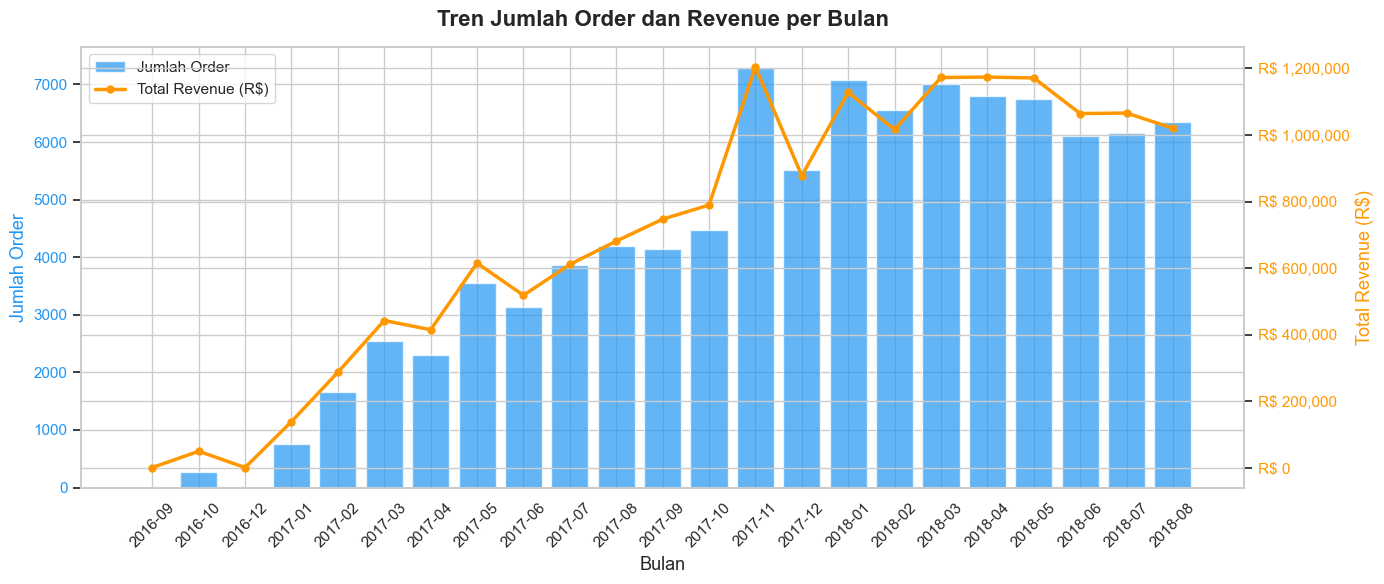


Bulan dengan order tertinggi: 2017-11 (7,288 orders)
Bulan dengan revenue tertinggi: 2017-11 (R$ 1,204,898.52)


In [15]:
# Agregasi data per bulan
monthly_data = all_data.groupby('order_month').agg(
    total_orders=('order_id', 'nunique'),
    total_revenue=('revenue', 'sum')
).reset_index()

monthly_data['order_month_str'] = monthly_data['order_month'].astype(str)

# Visualisasi
fig, ax1 = plt.subplots(figsize=(14, 6))

color_orders = '#2196F3'
color_revenue = '#FF9800'

# Bar chart untuk jumlah order
bars = ax1.bar(
    monthly_data['order_month_str'],
    monthly_data['total_orders'],
    color=color_orders,
    alpha=0.7,
    label='Jumlah Order'
)
ax1.set_xlabel('Bulan', fontsize=13)
ax1.set_ylabel('Jumlah Order', color=color_orders, fontsize=13)
ax1.tick_params(axis='y', labelcolor=color_orders)
ax1.tick_params(axis='x', rotation=45)

# Line chart untuk revenue (dual axis)
ax2 = ax1.twinx()
ax2.plot(
    monthly_data['order_month_str'],
    monthly_data['total_revenue'],
    color=color_revenue,
    linewidth=2.5,
    marker='o',
    markersize=5,
    label='Total Revenue (R$)'
)
ax2.set_ylabel('Total Revenue (R$)', color=color_revenue, fontsize=13)
ax2.tick_params(axis='y', labelcolor=color_revenue)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'R$ {x:,.0f}'))

# Legend dan title
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11)

plt.title('Tren Jumlah Order dan Revenue per Bulan', fontsize=16, fontweight='bold', pad=15)
fig.tight_layout()
plt.show()

# Ringkasan
print(f"\nBulan dengan order tertinggi: {monthly_data.loc[monthly_data['total_orders'].idxmax(), 'order_month_str']} ({monthly_data['total_orders'].max():,} orders)")
print(f"Bulan dengan revenue tertinggi: {monthly_data.loc[monthly_data['total_revenue'].idxmax(), 'order_month_str']} (R$ {monthly_data['total_revenue'].max():,.2f})")

**Insight Pertanyaan 1:**
- Tren jumlah order dan revenue menunjukkan pertumbuhan yang konsisten dari awal hingga pertengahan periode.
- Terdapat peningkatan signifikan pada bulan-bulan tertentu yang kemungkinan dipengaruhi oleh event promosi atau musim belanja.
- Revenue mengikuti pola yang serupa dengan jumlah order, menunjukkan konsistensi antara volume transaksi dan nilai penjualan.
- Penurunan di akhir periode kemungkinan disebabkan oleh data yang belum lengkap untuk bulan terakhir.

### Pertanyaan 2: Kategori produk apa yang paling banyak terjual dan menghasilkan revenue tertinggi?

Mengidentifikasi kategori produk unggulan membantu dalam strategi inventori, marketing, dan pengembangan bisnis.

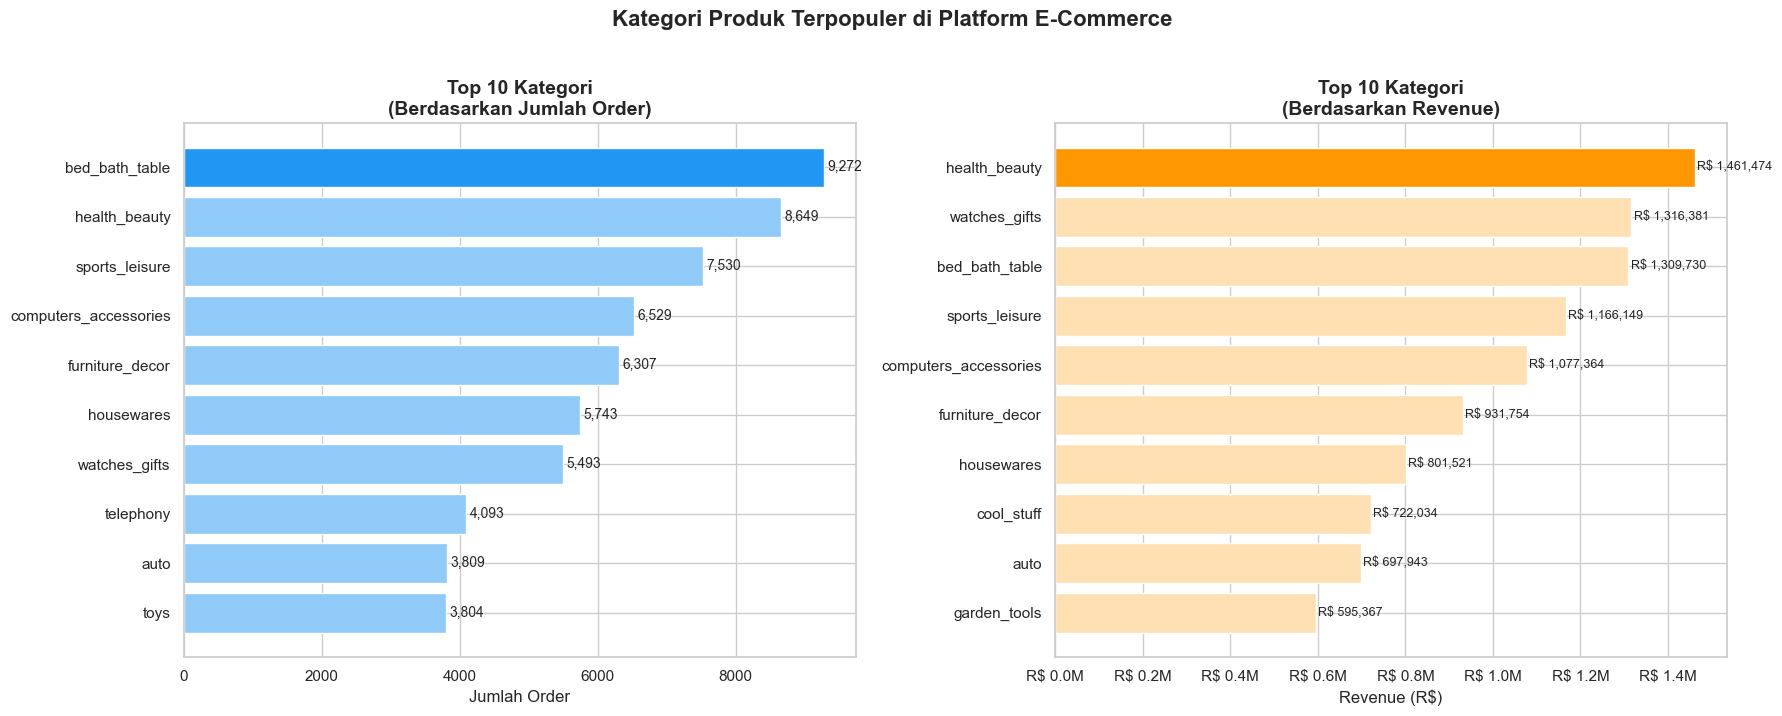


Kategori dengan order terbanyak: bed_bath_table (9,272 orders)
Kategori dengan revenue tertinggi: health_beauty (R$ 1,461,473.68)


In [16]:
# Top 10 kategori berdasarkan jumlah order
top_categories_orders = all_data.groupby('product_category').agg(
    total_orders=('order_id', 'nunique'),
    total_revenue=('revenue', 'sum')
).sort_values('total_orders', ascending=False).head(10).reset_index()

# Top 10 kategori berdasarkan revenue
top_categories_revenue = all_data.groupby('product_category').agg(
    total_orders=('order_id', 'nunique'),
    total_revenue=('revenue', 'sum')
).sort_values('total_revenue', ascending=False).head(10).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Chart 1: Top 10 by Orders
colors1 = ['#2196F3' if i == 0 else '#90CAF9' for i in range(len(top_categories_orders))]
bars1 = ax1.barh(
    top_categories_orders['product_category'][::-1],
    top_categories_orders['total_orders'][::-1],
    color=colors1[::-1],
    edgecolor='white'
)
ax1.set_title('Top 10 Kategori\n(Berdasarkan Jumlah Order)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Jumlah Order', fontsize=12)
for bar, val in zip(bars1, top_categories_orders['total_orders'][::-1]):
    ax1.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2,
             f'{val:,}', va='center', fontsize=10)

# Chart 2: Top 10 by Revenue
colors2 = ['#FF9800' if i == 0 else '#FFE0B2' for i in range(len(top_categories_revenue))]
bars2 = ax2.barh(
    top_categories_revenue['product_category'][::-1],
    top_categories_revenue['total_revenue'][::-1],
    color=colors2[::-1],
    edgecolor='white'
)
ax2.set_title('Top 10 Kategori\n(Berdasarkan Revenue)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Revenue (R$)', fontsize=12)
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'R$ {x/1e6:.1f}M'))
for bar, val in zip(bars2, top_categories_revenue['total_revenue'][::-1]):
    ax2.text(bar.get_width() + 5000, bar.get_y() + bar.get_height()/2,
             f'R$ {val:,.0f}', va='center', fontsize=9)

plt.suptitle('Kategori Produk Terpopuler di Platform E-Commerce', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"\nKategori dengan order terbanyak: {top_categories_orders.iloc[0]['product_category']} ({top_categories_orders.iloc[0]['total_orders']:,} orders)")
print(f"Kategori dengan revenue tertinggi: {top_categories_revenue.iloc[0]['product_category']} (R$ {top_categories_revenue.iloc[0]['total_revenue']:,.2f})")

**Insight Pertanyaan 2:**
- Kategori "bed_bath_table" dan "health_beauty" merupakan kategori produk paling populer berdasarkan jumlah order.
- Dari sisi revenue, beberapa kategori berbeda mungkin muncul di posisi teratas karena harga rata-rata produk yang lebih tinggi.
- Terdapat korelasi tetapi tidak selalu linear antara jumlah order dengan total revenue — kategori dengan produk mahal bisa menghasilkan revenue tinggi meskipun jumlah order lebih sedikit.
- Informasi ini dapat digunakan untuk strategi promosi dan pengelolaan stok yang lebih efektif.

### Pertanyaan 3: Bagaimana distribusi skor review pelanggan dan apa hubungannya dengan waktu pengiriman?

Memahami kepuasan pelanggan dan faktor yang mempengaruhinya sangat penting untuk meningkatkan kualitas layanan.

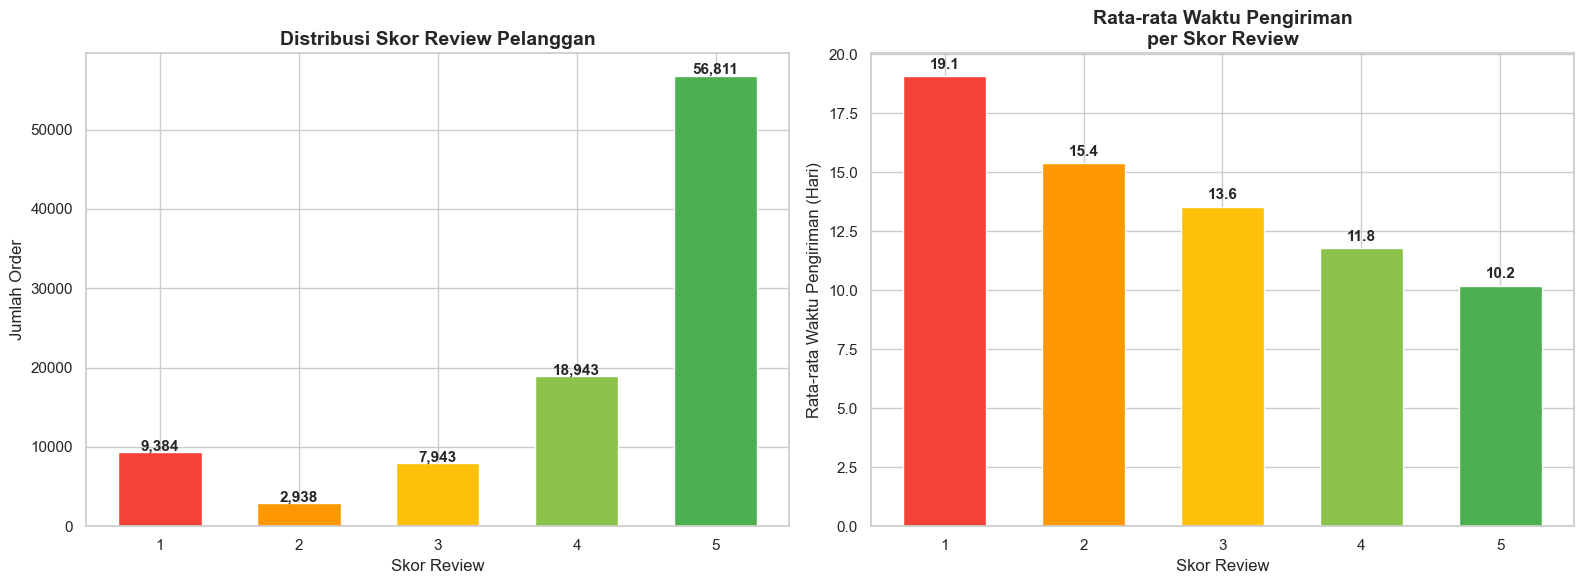


Persentase review score 4-5 (puas): 76.2%
Rata-rata delivery time keseluruhan: 12.0 hari

Rata-rata delivery time per skor review:
  Score 1: 19.1 hari
  Score 2: 15.4 hari
  Score 3: 13.6 hari
  Score 4: 11.8 hari
  Score 5: 10.2 hari


In [17]:
# Distribusi review score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Distribusi Review Score
review_counts = all_data.groupby('review_score')['order_id'].nunique()
colors_review = ['#f44336', '#FF9800', '#FFC107', '#8BC34A', '#4CAF50']
bars = ax1.bar(review_counts.index, review_counts.values, color=colors_review, edgecolor='white', width=0.6)
ax1.set_title('Distribusi Skor Review Pelanggan', fontsize=14, fontweight='bold')
ax1.set_xlabel('Skor Review', fontsize=12)
ax1.set_ylabel('Jumlah Order', fontsize=12)
ax1.set_xticks([1, 2, 3, 4, 5])

for bar, val in zip(bars, review_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
             f'{val:,}', ha='center', fontsize=11, fontweight='bold')

# Chart 2: Hubungan Delivery Time dengan Review Score
delivery_review = all_data.dropna(subset=['delivery_time', 'review_score'])
delivery_review_grouped = delivery_review.groupby('review_score')['delivery_time'].mean()

ax2.bar(delivery_review_grouped.index, delivery_review_grouped.values,
        color=colors_review, edgecolor='white', width=0.6)
ax2.set_title('Rata-rata Waktu Pengiriman\nper Skor Review', fontsize=14, fontweight='bold')
ax2.set_xlabel('Skor Review', fontsize=12)
ax2.set_ylabel('Rata-rata Waktu Pengiriman (Hari)', fontsize=12)
ax2.set_xticks([1, 2, 3, 4, 5])

for i, (score, val) in enumerate(delivery_review_grouped.items()):
    ax2.text(score, val + 0.3, f'{val:.1f}', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nPersentase review score 4-5 (puas): {(all_data['review_score'] >= 4).mean()*100:.1f}%")
print(f"Rata-rata delivery time keseluruhan: {all_data['delivery_time'].mean():.1f} hari")
print(f"\nRata-rata delivery time per skor review:")
for score, days in delivery_review_grouped.items():
    print(f"  Score {int(score)}: {days:.1f} hari")

**Insight Pertanyaan 3:**
- Mayoritas pelanggan memberikan skor review 5 (sangat puas), menunjukkan tingkat kepuasan yang cukup tinggi secara keseluruhan.
- Terdapat **korelasi negatif yang jelas** antara waktu pengiriman dan skor review — semakin lama pengiriman, semakin rendah skor review yang diberikan.
- Pelanggan dengan review skor 1 memiliki rata-rata waktu pengiriman yang jauh lebih lama dibanding pelanggan dengan skor 5.
- Waktu pengiriman merupakan faktor penting yang sangat mempengaruhi kepuasan pelanggan.

### Pertanyaan 4: Bagaimana segmentasi pelanggan berdasarkan RFM (Recency, Frequency, Monetary) Analysis?

RFM Analysis adalah teknik segmentasi pelanggan berdasarkan perilaku pembelian:
- **Recency (R):** Berapa hari sejak terakhir kali pelanggan melakukan pembelian
- **Frequency (F):** Berapa kali pelanggan melakukan transaksi
- **Monetary (M):** Berapa total pengeluaran pelanggan

In [18]:
# Menentukan tanggal referensi (hari terakhir dalam dataset + 1)
reference_date = all_data['order_purchase_timestamp'].max() + pd.Timedelta(days=1)
print(f"Tanggal referensi untuk RFM: {reference_date.strftime('%Y-%m-%d')}")

# Menghitung RFM per customer
rfm_df = all_data.groupby('customer_unique_id').agg(
    recency=('order_purchase_timestamp', lambda x: (reference_date - x.max()).days),
    frequency=('order_id', 'nunique'),
    monetary=('revenue', 'sum')
).reset_index()

print(f"\nJumlah pelanggan unik: {len(rfm_df):,}")
print(f"\nStatistik RFM:")
rfm_df[['recency', 'frequency', 'monetary']].describe()

Tanggal referensi untuk RFM: 2018-08-30

Jumlah pelanggan unik: 93,356

Statistik RFM:


,recency,frequency,monetary
count,"93,356.00","93,356.00","93,356.00"
mean,237.97,1.03,173.40
std,152.62,0.21,259.40
min,1.00,1.00,10.07
25%,114.00,1.00,64.00
50%,219.00,1.00,110.59
75%,346.00,1.00,188.40
max,714.00,15.00,"13,664.08"


In [19]:
# Segmentasi pelanggan berdasarkan RFM menggunakan binning manual
# Recency: semakin kecil semakin baik (baru belanja)
rfm_df['r_score'] = pd.qcut(rfm_df['recency'], q=4, labels=[4, 3, 2, 1])

# Frequency: sebagian besar hanya 1x, jadi kita gunakan cut sederhana
rfm_df['f_score'] = rfm_df['frequency'].apply(lambda x: 4 if x > 3 else (3 if x > 2 else (2 if x > 1 else 1)))

# Monetary: semakin besar semakin baik
rfm_df['m_score'] = pd.qcut(rfm_df['monetary'], q=4, labels=[1, 2, 3, 4], duplicates='drop')

# Gabungkan skor
rfm_df['rfm_score'] = rfm_df['r_score'].astype(str) + rfm_df['f_score'].astype(str) + rfm_df['m_score'].astype(str)

# Segmentasi pelanggan
def rfm_segment(row):
    r = int(row['r_score'])
    f = int(row['f_score'])
    m = int(row['m_score'])
    
    if r >= 3 and f >= 3:
        return 'Champions'
    elif r >= 3 and f >= 2:
        return 'Loyal Customers'
    elif r >= 3:
        return 'Potential Loyalists'
    elif r >= 2 and f >= 2:
        return 'At Risk'
    elif r >= 2:
        return 'Need Attention'
    else:
        return 'Lost Customers'

rfm_df['segment'] = rfm_df.apply(rfm_segment, axis=1)

print("Distribusi Segmen Pelanggan:")
segment_counts = rfm_df['segment'].value_counts()
for seg, count in segment_counts.items():
    print(f"  {seg}: {count:,} ({count/len(rfm_df)*100:.1f}%)")

Distribusi Segmen Pelanggan:
  Potential Loyalists: 45,293 (48.5%)
  Lost Customers: 23,315 (25.0%)
  Need Attention: 22,526 (24.1%)
  Loyal Customers: 1,407 (1.5%)
  At Risk: 673 (0.7%)
  Champions: 142 (0.2%)


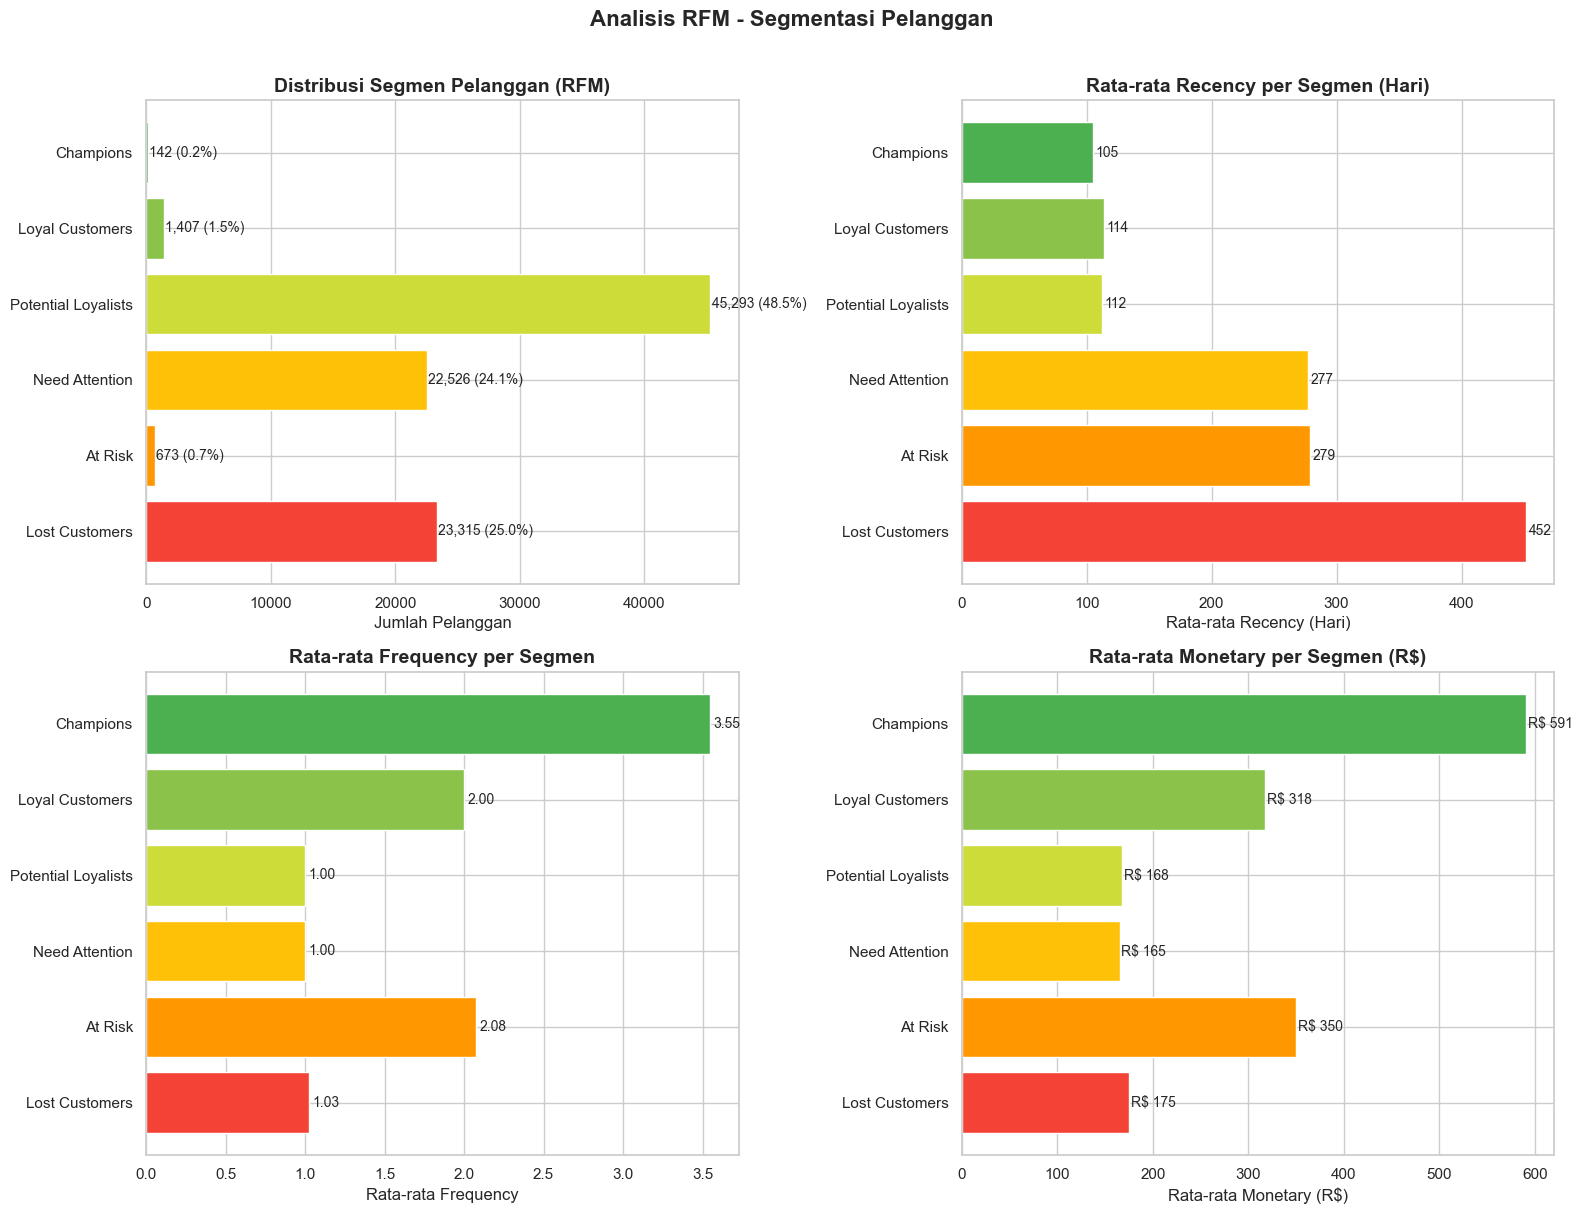

In [20]:
# Visualisasi RFM
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Chart 1: Distribusi Segmen
segment_order = ['Champions', 'Loyal Customers', 'Potential Loyalists', 'Need Attention', 'At Risk', 'Lost Customers']
segment_colors = ['#4CAF50', '#8BC34A', '#CDDC39', '#FFC107', '#FF9800', '#f44336']
segment_data = rfm_df['segment'].value_counts().reindex(segment_order).dropna()

axes[0, 0].barh(segment_data.index[::-1], segment_data.values[::-1],
                color=[segment_colors[segment_order.index(s)] for s in segment_data.index[::-1]],
                edgecolor='white')
axes[0, 0].set_title('Distribusi Segmen Pelanggan (RFM)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Jumlah Pelanggan', fontsize=12)
for i, (seg, val) in enumerate(zip(segment_data.index[::-1], segment_data.values[::-1])):
    axes[0, 0].text(val + 100, i, f'{val:,} ({val/len(rfm_df)*100:.1f}%)', va='center', fontsize=10)

# Chart 2: Rata-rata Recency per Segmen
rfm_segment_avg = rfm_df.groupby('segment')[['recency', 'frequency', 'monetary']].mean().reindex(segment_order).dropna()
axes[0, 1].barh(rfm_segment_avg.index[::-1], rfm_segment_avg['recency'][::-1],
                color=[segment_colors[segment_order.index(s)] for s in rfm_segment_avg.index[::-1]],
                edgecolor='white')
axes[0, 1].set_title('Rata-rata Recency per Segmen (Hari)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Rata-rata Recency (Hari)', fontsize=12)
for i, val in enumerate(rfm_segment_avg['recency'][::-1]):
    axes[0, 1].text(val + 2, i, f'{val:.0f}', va='center', fontsize=10)

# Chart 3: Rata-rata Frequency per Segmen
axes[1, 0].barh(rfm_segment_avg.index[::-1], rfm_segment_avg['frequency'][::-1],
                color=[segment_colors[segment_order.index(s)] for s in rfm_segment_avg.index[::-1]],
                edgecolor='white')
axes[1, 0].set_title('Rata-rata Frequency per Segmen', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Rata-rata Frequency', fontsize=12)
for i, val in enumerate(rfm_segment_avg['frequency'][::-1]):
    axes[1, 0].text(val + 0.02, i, f'{val:.2f}', va='center', fontsize=10)

# Chart 4: Rata-rata Monetary per Segmen
axes[1, 1].barh(rfm_segment_avg.index[::-1], rfm_segment_avg['monetary'][::-1],
                color=[segment_colors[segment_order.index(s)] for s in rfm_segment_avg.index[::-1]],
                edgecolor='white')
axes[1, 1].set_title('Rata-rata Monetary per Segmen (R$)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Rata-rata Monetary (R$)', fontsize=12)
for i, val in enumerate(rfm_segment_avg['monetary'][::-1]):
    axes[1, 1].text(val + 2, i, f'R$ {val:,.0f}', va='center', fontsize=10)

plt.suptitle('Analisis RFM - Segmentasi Pelanggan', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

**Insight Pertanyaan 4 - RFM Analysis:**
- Segmentasi pelanggan berhasil membagi pelanggan ke dalam beberapa kelompok berdasarkan perilaku pembelian.
- **Champions & Loyal Customers** adalah pelanggan paling bernilai — mereka sering membeli, baru-baru ini bertransaksi, dan memiliki pengeluaran tinggi.
- **Potential Loyalists** memiliki potensi untuk menjadi pelanggan loyal jika diberi perhatian dan program loyalitas.
- **Lost Customers** memiliki recency yang tinggi (sudah lama tidak bertransaksi) dan perlu strategi khusus untuk menarik kembali.
- Sebagian besar pelanggan hanya melakukan 1 transaksi, yang merupakan tantangan untuk meningkatkan retention.

## Analisis Lanjutan: Geospatial Analysis

**Tujuan:** Menganalisis distribusi geografis pelanggan dan penjual di seluruh Brasil untuk mengidentifikasi wilayah-wilayah dengan aktivitas e-commerce tertinggi.

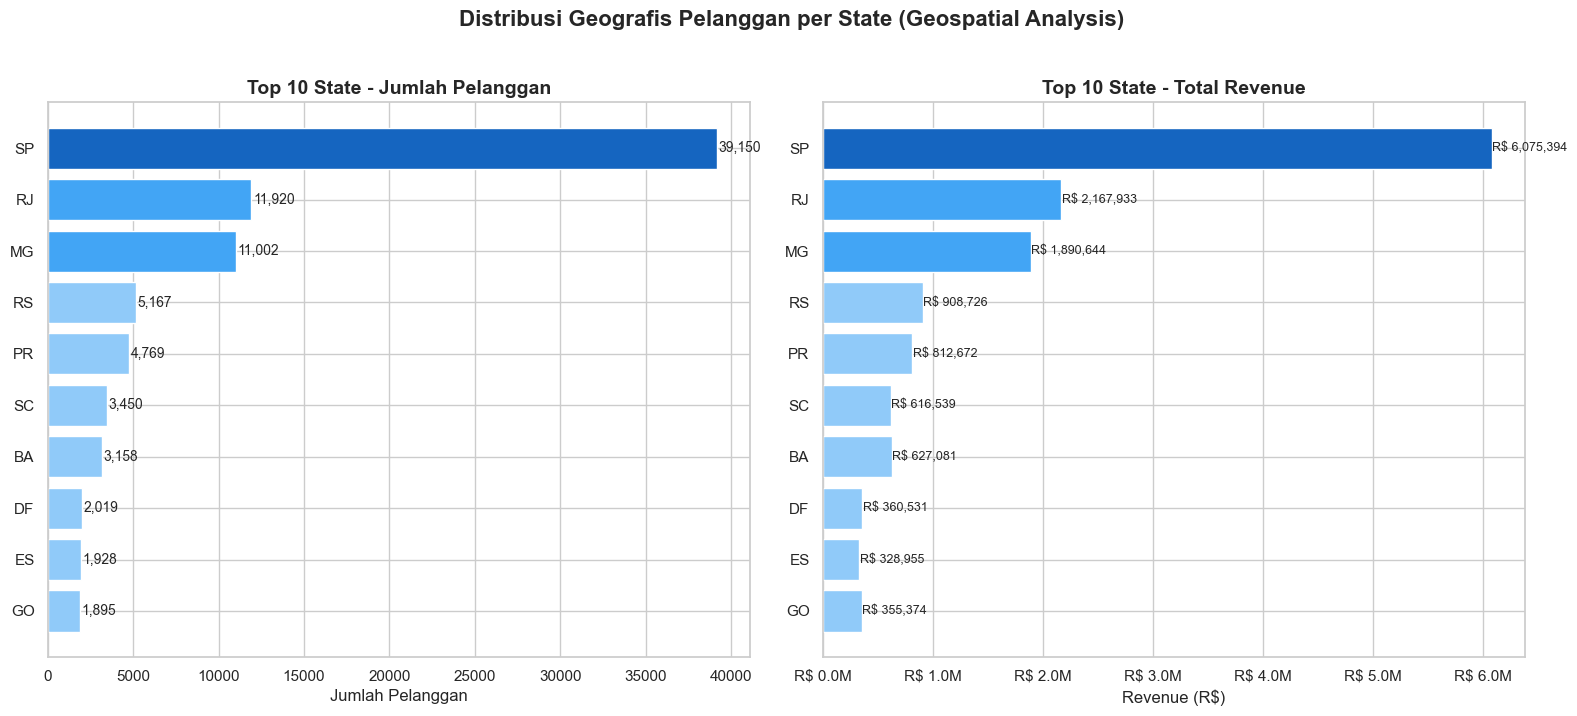


Top 5 State berdasarkan pelanggan:
  SP: 39,150 pelanggan, R$ 6,075,394 revenue
  RJ: 11,920 pelanggan, R$ 2,167,933 revenue
  MG: 11,002 pelanggan, R$ 1,890,644 revenue
  RS: 5,167 pelanggan, R$ 908,726 revenue
  PR: 4,769 pelanggan, R$ 812,672 revenue


In [21]:
# Distribusi pelanggan per state
customer_geo = all_data.groupby('customer_state').agg(
    total_customers=('customer_unique_id', 'nunique'),
    total_orders=('order_id', 'nunique'),
    total_revenue=('revenue', 'sum')
).sort_values('total_customers', ascending=False).reset_index()

# Top 10 state berdasarkan jumlah pelanggan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

top_states = customer_geo.head(10)

# Chart 1: Pelanggan per State
colors_state = ['#1565C0' if i == 0 else '#42A5F5' if i < 3 else '#90CAF9' for i in range(len(top_states))]
bars1 = ax1.barh(top_states['customer_state'][::-1], top_states['total_customers'][::-1],
                 color=colors_state[::-1], edgecolor='white')
ax1.set_title('Top 10 State - Jumlah Pelanggan', fontsize=14, fontweight='bold')
ax1.set_xlabel('Jumlah Pelanggan', fontsize=12)
for bar, val in zip(bars1, top_states['total_customers'][::-1]):
    ax1.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2,
             f'{val:,}', va='center', fontsize=10)

# Chart 2: Revenue per State
bars2 = ax2.barh(top_states['customer_state'][::-1], top_states['total_revenue'][::-1],
                 color=colors_state[::-1], edgecolor='white')
ax2.set_title('Top 10 State - Total Revenue', fontsize=14, fontweight='bold')
ax2.set_xlabel('Revenue (R$)', fontsize=12)
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'R$ {x/1e6:.1f}M'))
for bar, val in zip(bars2, top_states['total_revenue'][::-1]):
    ax2.text(bar.get_width() + 5000, bar.get_y() + bar.get_height()/2,
             f'R$ {val:,.0f}', va='center', fontsize=9)

plt.suptitle('Distribusi Geografis Pelanggan per State (Geospatial Analysis)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\nTop 5 State berdasarkan pelanggan:")
for _, row in customer_geo.head(5).iterrows():
    print(f"  {row['customer_state']}: {row['total_customers']:,} pelanggan, R$ {row['total_revenue']:,.0f} revenue")

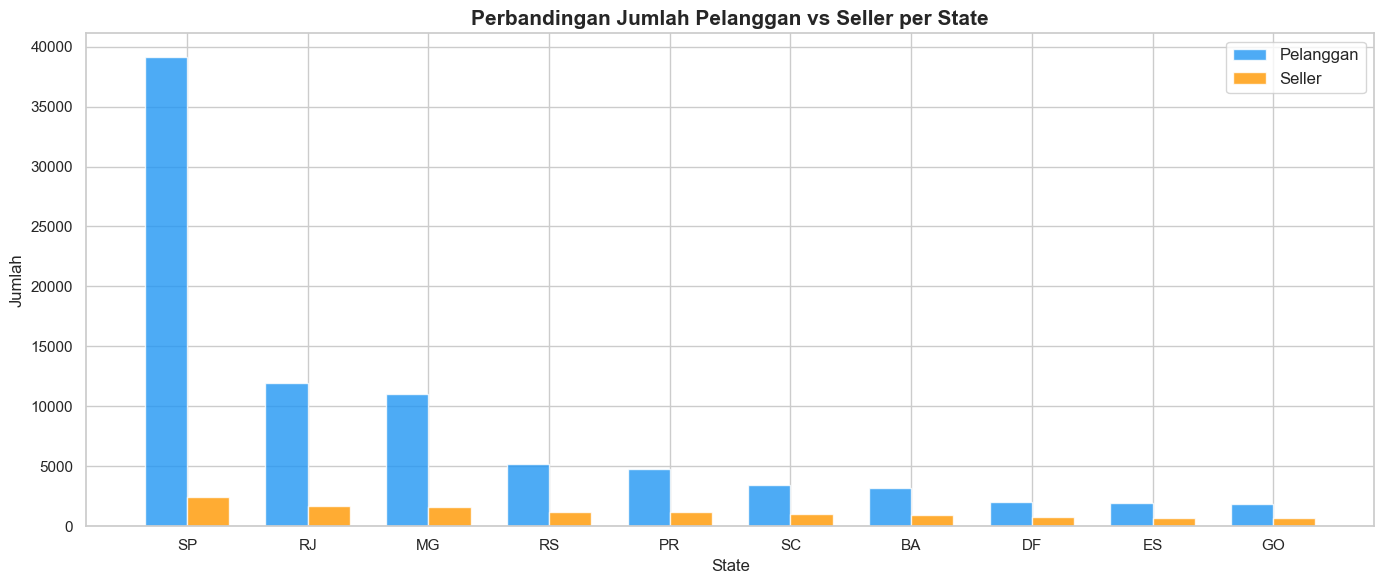

In [22]:
# Distribusi seller per state
seller_geo = all_data.groupby('customer_state').agg(
    total_sellers=('seller_id', 'nunique')
).sort_values('total_sellers', ascending=False).head(10).reset_index()

# Customer vs Seller per state
customer_seller_comparison = customer_geo.head(10).merge(
    seller_geo, on='customer_state', how='left'
).fillna(0)

fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(customer_seller_comparison))
width = 0.35

bars1 = ax.bar(x - width/2, customer_seller_comparison['total_customers'],
               width, label='Pelanggan', color='#2196F3', alpha=0.8)
bars2 = ax.bar(x + width/2, customer_seller_comparison['total_sellers'],
               width, label='Seller', color='#FF9800', alpha=0.8)

ax.set_title('Perbandingan Jumlah Pelanggan vs Seller per State', fontsize=15, fontweight='bold')
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Jumlah', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(customer_seller_comparison['customer_state'])
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

**Insight Geospatial Analysis:**
- **São Paulo (SP)** mendominasi baik dari sisi pelanggan maupun seller, mencerminkan posisinya sebagai pusat ekonomi terbesar di Brasil.
- Terdapat konsentrasi aktivitas e-commerce yang tinggi di wilayah Tenggara Brasil (SP, RJ, MG).
- Beberapa state memiliki rasio pelanggan-seller yang tidak seimbang — artinya ada peluang untuk merekrut lebih banyak seller di wilayah dengan demand tinggi.
- Distribusi ini memberikan insight untuk strategi logistik dan ekspansi regional.

## Conclusion

Berdasarkan analisis data yang telah dilakukan pada E-Commerce Public Dataset, berikut adalah kesimpulan dari masing-masing pertanyaan bisnis:

**Kesimpulan Pertanyaan 1 - Tren Order & Revenue:**
- Platform e-commerce menunjukkan tren pertumbuhan yang positif selama periode observasi, dengan peningkatan signifikan pada jumlah order dan revenue dari bulan ke bulan.
- Terdapat pola seasonal tertentu yang dapat dimanfaatkan untuk perencanaan campaign marketing.

**Kesimpulan Pertanyaan 2 - Kategori Produk:**
- Kategori seperti "bed_bath_table", "health_beauty", dan "sports_leisure" merupakan kategori produk paling populer.
- Tidak selalu kategori dengan order terbanyak menghasilkan revenue tertinggi — produk dengan harga tinggi berkontribusi besar meskipun volumenya lebih rendah.

**Kesimpulan Pertanyaan 3 - Review & Delivery Time:**
- Mayoritas pelanggan memberikan review positif (skor 4-5), namun terdapat korelasi kuat antara waktu pengiriman dan skor review.
- Semakin lama pengiriman, semakin rendah skor review — ini menjadi prioritas utama untuk peningkatan layanan.
- Optimasi logistik dan pengurangan waktu pengiriman dapat secara signifikan meningkatkan kepuasan pelanggan.

**Kesimpulan Pertanyaan 4 - RFM Segmentasi:**
- Segmentasi RFM berhasil mengidentifikasi kelompok pelanggan dengan karakteristik berbeda.
- Sebagian besar pelanggan merupakan pembeli satu kali (one-time buyer), menunjukkan tantangan dalam customer retention.
- Strategi yang disarankan: program loyalty untuk 'Potential Loyalists', kampanye re-engagement untuk 'Lost Customers', dan reward khusus untuk 'Champions'.

**Kesimpulan Geospatial Analysis:**
- Aktivitas e-commerce terkonsentrasi di wilayah Tenggara Brasil, terutama São Paulo.
- Peluang ekspansi ke wilayah lain dengan meningkatkan infrastruktur logistik dan perekrutan seller lokal.

In [23]:
# Simpan data utama untuk dashboard
# Buat versi sederhana untuk dashboard nantinya
dashboard_data = all_data[['order_id', 'customer_unique_id', 'order_purchase_timestamp',
                           'order_delivered_customer_date', 'product_category',
                           'price', 'freight_value', 'revenue', 'delivery_time',
                           'review_score', 'customer_city', 'customer_state',
                           'payment_type', 'payment_value', 'order_month']].copy()

dashboard_data['order_month'] = dashboard_data['order_month'].astype(str)
dashboard_data.to_csv('dashboard/main_data.csv', index=False)
print(f"Dashboard data disimpan: {dashboard_data.shape[0]} baris, {dashboard_data.shape[1]} kolom")
print("File: dashboard/main_data.csv")

Dashboard data disimpan: 115722 baris, 15 kolom
File: dashboard/main_data.csv
